<a href="https://colab.research.google.com/github/ZeinHajjAli/CarletonBuildingIdentifier/blob/master/CarletonBuildingIdentifier_ModelBuilder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carleton Building Identifier

This notebook should generate a CNN model using Keras to identify buildings on the Carleton University campus from pictures taken a reasonable distance away. The notebook needs a Kaggle username and API key to dowload the training dataset, so it will return an error if it is ran without that key.

## Step 1: Install and import dependancies and set up environment.


In [0]:
import tensorflow as tf
!pip install -q keras

In [0]:
import os

# TODO: delete kaggle username and key
os.environ['KAGGLE_USERNAME'] = ""
os.environ['KAGGLE_KEY'] = ""

# Download dataset and unzip
!kaggle datasets download -d zeinhajjali/carletonbuildingsreviewed
!unzip carletonbuildingsreviewed.zip
!mv All_Images_500x500 train

 94% 195M/208M [00:08<00:00, 16.0MB/s]
100% 208M/208M [00:08<00:00, 25.4MB/s]
Archive:  carletonbuildingsreviewed.zip
  inflating: All_Images_500x500/AA/030_1.jpg  
  inflating: All_Images_500x500/AA/030_2.jpg  
  inflating: All_Images_500x500/AA/030_3.jpg  
  inflating: All_Images_500x500/AA/030_4.jpg  
  inflating: All_Images_500x500/AA/030_5.jpg  
  inflating: All_Images_500x500/AA/081_1.jpg  
  inflating: All_Images_500x500/AA/081_2.jpg  
  inflating: All_Images_500x500/AA/081_3.jpg  
  inflating: All_Images_500x500/AA/081_4.jpg  
  inflating: All_Images_500x500/AA/081_5.jpg  
  inflating: All_Images_500x500/AA/120-1.jpg  
  inflating: All_Images_500x500/AA/120-2.jpg  
  inflating: All_Images_500x500/AA/120-3.jpg  
  inflating: All_Images_500x500/AA/120-4.jpg  
  inflating: All_Images_500x500/AA/120-5.jpg  
  inflating: All_Images_500x500/AA/120-6.jpg  
  inflating: All_Images_500x500/AA/128-1.jpg  
  inflating: All_Images_500x500/AA/128-2.jpg  
  inflating: All_Images_500x500/AA/1

## Step 2: Split the data into folders for training and testing.

A test size of 0.20 is used to leave enough data for training since the dataset is not particularly large.

In [0]:
from glob import glob
from sklearn.model_selection import train_test_split

AA = glob('train/AA/*.jpg')
CB = glob('train/CB/*.jpg')
CT = glob('train/CT/*.jpg')
DT = glob('train/DT/*.jpg')
FH = glob('train/FH/*.jpg')
HP = glob('train/HP/*.jpg')
HS = glob('train/HS/*.jpg')
LB = glob('train/LB/*.jpg')
MC = glob('train/MC/*.jpg')
ME = glob('train/ME/*.jpg')
ML = glob('train/ML/*.jpg')
PA = glob('train/PA/*.jpg')
RB = glob('train/RB/*.jpg')
RO = glob('train/RO/*.jpg')
SA = glob('train/SA/*.jpg')
TB = glob('train/TB/*.jpg')

TEST_SIZE = 0.20
AA_train, AA_test = train_test_split(AA, test_size=TEST_SIZE)
CB_train, CB_test = train_test_split(CB, test_size=TEST_SIZE)
CT_train, CT_test = train_test_split(CT, test_size=TEST_SIZE)
DT_train, DT_test = train_test_split(DT, test_size=TEST_SIZE)
FH_train, FH_test = train_test_split(FH, test_size=TEST_SIZE)
HP_train, HP_test = train_test_split(HP, test_size=TEST_SIZE)
HS_train, HS_test = train_test_split(HS, test_size=TEST_SIZE)
LB_train, LB_test = train_test_split(LB, test_size=TEST_SIZE)
MC_train, MC_test = train_test_split(MC, test_size=TEST_SIZE)
ME_train, ME_test = train_test_split(ME, test_size=TEST_SIZE)
ML_train, ML_test = train_test_split(ML, test_size=TEST_SIZE)
PA_train, PA_test = train_test_split(PA, test_size=TEST_SIZE)
RB_train, RB_test = train_test_split(RB, test_size=TEST_SIZE)
RO_train, RO_test = train_test_split(RO, test_size=TEST_SIZE)
SA_train, SA_test = train_test_split(SA, test_size=TEST_SIZE)
TB_train, TB_test = train_test_split(TB, test_size=TEST_SIZE)

TRAIN_DIR = 'train'
TEST_DIR = 'test'

!mkdir test

!mkdir test/AA
files = ' '.join(AA_test)
!mv -t test/AA $files

!mkdir test/CB
files = ' '.join(CB_test)
!mv -t test/CB $files

!mkdir test/CT
files = ' '.join(CT_test)
!mv -t test/CT $files

!mkdir test/DT
files = ' '.join(DT_test)
!mv -t test/DT $files

!mkdir test/FH
files = ' '.join(FH_test)
!mv -t test/FH $files

!mkdir test/HP
files = ' '.join(HP_test)
!mv -t test/HP $files

!mkdir test/HS
files = ' '.join(HS_test)
!mv -t test/HS $files

!mkdir test/LB
files = ' '.join(LB_test)
!mv -t test/LB $files

!mkdir test/MC
files = ' '.join(MC_test)
!mv -t test/MC $files

!mkdir test/ME
files = ' '.join(ME_test)
!mv -t test/ME $files

!mkdir test/ML
files = ' '.join(ML_test)
!mv -t test/ML $files

!mkdir test/PA
files = ' '.join(PA_test)
!mv -t test/PA $files

!mkdir test/RB
files = ' '.join(RB_test)
!mv -t test/RB $files

!mkdir test/RO
files = ' '.join(RO_test)
!mv -t test/RO $files

!mkdir test/SA
files = ' '.join(SA_test)
!mv -t test/SA $files

!mkdir test/TB
files = ' '.join(TB_test)
!mv -t test/TB $files

AA_test = glob('test/AA/*.jpg')
CB_test = glob('test/CB/*.jpg')
CT_test = glob('test/CT/*.jpg')
DT_test = glob('test/DT/*.jpg')
FH_test = glob('test/FH/*.jpg')
HP_test = glob('test/HP/*.jpg')
HS_test = glob('test/HS/*.jpg')
LB_test = glob('test/LB/*.jpg')
MC_test = glob('test/MC/*.jpg')
ME_test = glob('test/ME/*.jpg')
ML_test = glob('test/ML/*.jpg')
PA_test = glob('test/PA/*.jpg')
RB_test = glob('test/RB/*.jpg')
RO_test = glob('test/RO/*.jpg')
SA_test = glob('test/SA/*.jpg')
TB_test = glob('test/TB/*.jpg')

In here we are just organising the building lists into a list for tests and a list for training. This is jsut to make it easier to loop through each of the images.

In [0]:
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
import numpy as np

building_tests = (AA_test, CB_test, CT_test, DT_test, FH_test, HP_test, HS_test, LB_test, MC_test, ME_test, ML_test, PA_test, RB_test, RO_test, SA_test, TB_test)
building_trainings = (AA_train, CB_train, CT_train, DT_train, FH_train, HP_train, HS_train, LB_train, MC_train, ME_train, ML_train, PA_train, RB_train, RO_train, SA_train, TB_train)
labels = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')

## Step 3: Build the layers of the NN

We picked a CNN after trying a model based on the Keras Inception V3 and finding it not very accuract with too long of a training time. We built this CNN to accept images of size 500x500x3 (RGB). It ends with a Dense layer with 16 units, one fo reach of our possibilities. An approach we would have tried if we had more time would have been to build 16 seperate binary classifiers and then comparing the resulting confidence levels.

In [0]:
import keras
from keras.models import Model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.applications.inception_v3 import InceptionV3, preprocess_input
CLASSES = 16

# ASSIGNMENT 2 MODEL
# 0.3 Average Accuracy

# base_model = InceptionV3(weights='imagenet', include_top=False)

# x = base_model.output
# x = GlobalAveragePooling2D(name='avg_pool')(x)
# x = Dropout(0.4)(x)
# predictions = Dense(CLASSES, activation='softmax')(x)
# model = Model(inputs=base_model.input, outputs=predictions)

# for layer in base_model.layers:
#   layer.trainable = False

# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# SimpleCNN model
# 0.775 Average Accuracy

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(CLASSES, activation = 'softmax'))


# Sequential model with larger filters
# Average Accuracy
# 

# model = Sequential()
# model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(500,500,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(CLASSES, activation='softmax'))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




## Step 4: Build the data generators to feed the CNN batches of training and testing data. 

Setiing the image transformation parameters is a matter of trial and error as well as common sense. One must examine a few of the images of each building to get a sense of how they differ and what transformations might help the CNN train the weights correctly.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()

WIDTH = 500
HEIGHT = 500
BATCH_SIZE = 32 
ROTATION_RANGE = 20
WIDTH_SHIFT_RANGE = 0.5
HEIGHT_SHIFT_RANGE = 0.5
SHEAR_RANGE = 0.4
ZOOM_RANGE = 0.2
HORIZONTAL_FLIP = True
VERTICAL_FLIP = False
FILL_MODE = 'nearest'

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=ROTATION_RANGE,
    width_shift_range=WIDTH_SHIFT_RANGE,
    height_shift_range=HEIGHT_SHIFT_RANGE,
    shear_range=SHEAR_RANGE,
    zoom_range=ZOOM_RANGE,
    horizontal_flip=HORIZONTAL_FLIP,
    vertical_flip=VERTICAL_FLIP,
    fill_mode=FILL_MODE
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=ROTATION_RANGE,
    width_shift_range=WIDTH_SHIFT_RANGE,
    height_shift_range=HEIGHT_SHIFT_RANGE,
    shear_range=SHEAR_RANGE,
    zoom_range=ZOOM_RANGE,
    horizontal_flip=HORIZONTAL_FLIP,
    vertical_flip=VERTICAL_FLIP,
    fill_mode=FILL_MODE
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 2635 images belonging to 16 classes.
Found 667 images belonging to 16 classes.


Print out a batch of the augmented images to see if there is anything to tweak.

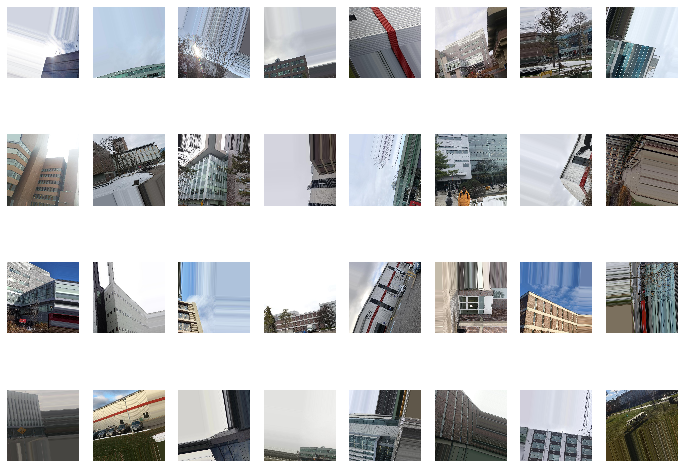

In [0]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
plt.style.use('dark_background')
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
  plt.subplot(4, 8, k+1)
  plt.imshow((img + 1) / 2)
  plt.axis('off')

## Step 5: Train the classifier.

When first picking the type of classifier to use, we used a much lower number of epochs and steps_per_epoch, but after finding one that had steadily increasing accuracy and decreasing loss, we decided to increase both hyperparameters and train the CNN for as long as Google Colab would allow the runtime to stay alive.

In [0]:
EPOCHS = 100
BATCH_SIZE = 32
STEPS_PER_EPOCH = 100
VALIDATION_STEPS = 32

MODEL_FILE = 'Sequential.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS
)

model.save(MODEL_FILE)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
100/100 [==============================] - 260s 3s/step - loss: 3.8494 - acc: 0.0943 - val_loss: 5.1547 - val_acc: 0.0805
Epoch 2/100
100/100 [==============================] - 231s 2s/step - loss: 2.9590 - acc: 0.0847 - val_loss: 3.9535 - val_acc: 0.0789
Epoch 3/100
100/100 [==============================] - 234s 2s/step - loss: 2.8023 - acc: 0.1068 - val_loss: 3.5180 - val_acc: 0.1384
Epoch 4/100
100/100 [==============================] - 232s 2s/step - loss: 2.7589 - acc: 0.1303 - val_loss: 3.8107 - val_acc: 0.1134
Epoch 5/100
100/100 [==============================] - 230s 2s/step - loss: 2.6760 - acc: 0.1500 - val_loss: 2.9817 - val_acc: 0.1560
Epoch 6/100
100/100 [==============================] - 231s 2s/step - loss: 2.5672 - acc: 0.1631 - val_loss: 3.4713 - val_acc: 0.1174
Epoch 7/100
100/100 [==============================] - 229s 2s/step - loss: 2.5341 - acc: 0.1696 - v

### Graph the accuracy and loss over the epochs.

We seemed to pick a sweet spot for the number of epochs, since we can see on the graph that the increase in accuracy started to level out and get to a steady state. Increasing the epochs to 125 of 150 would be nice to see the maximum accuracy that can be achieved, but Colab kills runtimes after about 8 or 9 hours, so there is not use trying it unless it is run on a local GPU.

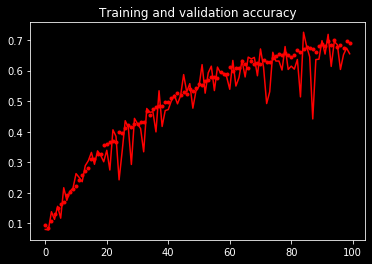

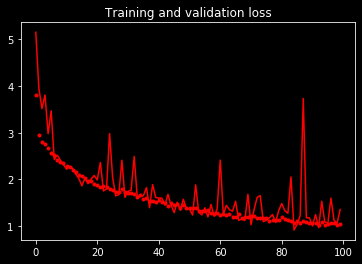

In [0]:
from keras.models import load_model
model = load_model(MODEL_FILE)

def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

### Evaluate the model on a few batches of testing sets.

In [0]:
# TODO: test predictions
x_batch, y_batch = next(validation_generator)

print(model.metrics_names)
print(model.evaluate(x_batch, y_batch))

x_batch, y_batch = next(validation_generator)

print(model.metrics_names)
print(model.evaluate(x_batch, y_batch))

x_batch, y_batch = next(validation_generator)

print(model.metrics_names)
print(model.evaluate(x_batch, y_batch))

x_batch, y_batch = next(validation_generator)

print(model.metrics_names)
print(model.evaluate(x_batch, y_batch))

['loss', 'acc']
32/32 [==============================] - 0s 10ms/step
[0.8507490754127502, 0.78125]
['loss', 'acc']
32/32 [==============================] - 0s 3ms/step
[1.0789819955825806, 0.625]
['loss', 'acc']
32/32 [==============================] - 0s 3ms/step
[1.1919351816177368, 0.65625]
['loss', 'acc']
32/32 [==============================] - 0s 3ms/step
[1.4057695865631104, 0.71875]


## Get Results

Below are a few blocks of code to test for the recall and precision of each building, as well as the average recall and precision. It also gets the accuracy of the model as a whole.

In [0]:
preds = []
for i in range(16):
  buildingLabels = []
  for j in range(len(building_tests[i])):
    x = kp_image.img_to_array(Image.open(building_tests[i][j]).convert('RGB'))
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    maxIndex = 0
    for k in range(1, 16):
      if pred[0][k] > pred[0][maxIndex]:
        maxIndex = k
    # label = labels[maxIndex]
    label = maxIndex
    buildingLabels.append(label)
  preds.append(buildingLabels)

In [0]:
recalls = []
truePositives = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
falsePositives = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(16):
  print('Recall for {}'.format(labels[i]))
  correct = 0
  for j in range(len(preds[i])):
    if preds[i][j] == i:
      truePositives[i] = truePositives[i]+1
    else:
      falsePositives[preds[i][j]] = falsePositives[preds[i][j]]+1
  rec = truePositives[i]/len(preds[i])
  recalls.append(rec)
  print(rec)

averageRecall = sum(recalls)/len(recalls)
print("The average recall is {}".format(averageRecall))
worstRecall = min(recalls)
print("The worst recall is that of {}, with a recall of {}".format(labels[recalls.index(worstRecall)], worstRecall))

In [0]:
precisions = []
for i in range(16):
  print('Precision for {}'.format(labels[i]))
  prec = truePositives[i] / (truePositives[i] + falsePositives[i])
  precisions.append(prec)
  print(prec)

averagePrecision = sum(precisions)/len(precisions)
print("The average precision is {}".format(averagePrecision))
bestPrecision = max(precisions)
print("The worst precision is that of {}, with a precision of {}".format(labels[precisions.index(bestPrecision)], bestPrecision))

In [0]:
acc = sum(truePositives) / (sum(truePositives) + sum(falsePositives))
print(acc)